In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [35]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

(1282, 2) (1295, 2)


In [36]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

In [37]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

(925, 2)


In [38]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

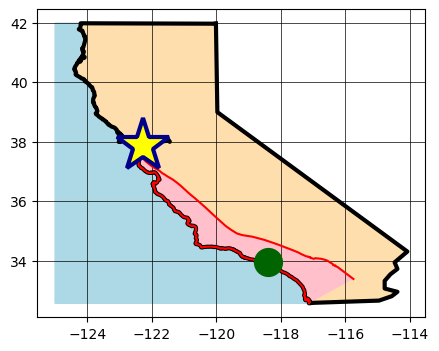

In [39]:
plt.rcParams['figure.figsize'] = [5, 4]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

The goal is to figure out the surface area of California. Here, we have various charts in which we plot over each other. The only one tha seems relavant is the boundary of California as the area contained within would be the relavant portion. Here's my strategy. In problem 1, we calculated the suface area of the world using the world map, I think we should find the subset of that rectangular map that would show California in a box like this. Like this:

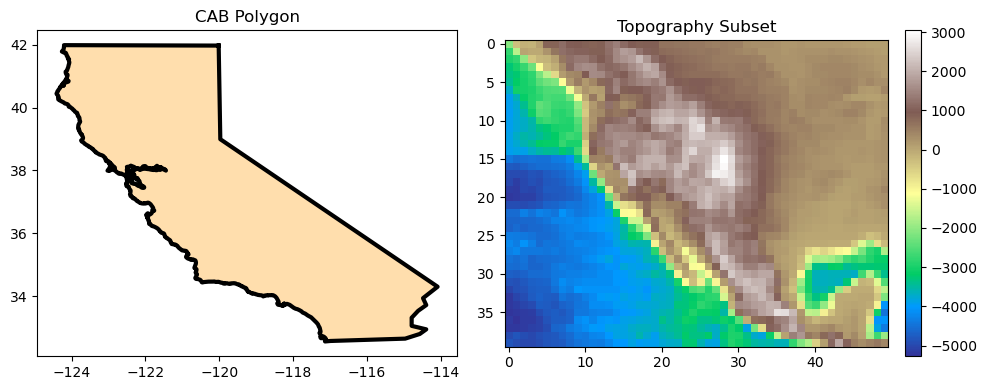

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 4]

fig, axs = plt.subplots(1, 2)

axs[0].plot(CAB[:,0], CAB[:,1], 'k-', lw=3)
axs[0].fill(CAB[:,0], CAB[:,1], 'navajowhite')
axs[0].set_title("CAB Polygon")

H = np.loadtxt('topography_180x360_grid.txt')
CA = H[35:75, 225:275]

im = axs[1].imshow(CA, cmap="terrain")
axs[1].set_title("Topography Subset")
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


Assume that it's a better side by side fit. But the logic is, we figure out what percent of that subset is of the total surface area from the topography. Say it's 1000 mi. squared. Now, we find out what percent of that block in the CAB Polygon is the SA of California. We just find the part filled between the border. Then, we multiply that percent by the SA that we found in the topography subset.

Thus, the SA of California is: (% of topography that block encomposses) * (% of California taking up that block)